In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.applications import VGG16

In [2]:
train_path = "dataset/train"
val_path = "dataset/val"

In [3]:
# Load the VGG16 model pre-trained on ImageNet, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

In [4]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16320449 (62.26 MB)
Trainable params: 1605761 (6.13 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [5]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

In [6]:
val_datagen = image.ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 320 images belonging to 2 classes.


In [8]:
validation_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 72 images belonging to 2 classes.


In [9]:
hist = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/5
8/8 [==============================] - 22s 3s/step - loss: 0.3958 - accuracy: 0.8320 - val_loss: 0.0750 - val_accuracy: 0.9688
Epoch 2/5
8/8 [==============================] - 20s 3s/step - loss: 0.1517 - accuracy: 0.9492 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 21s 3s/step - loss: 0.0606 - accuracy: 0.9805 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 20s 2s/step - loss: 0.0204 - accuracy: 0.9961 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/5
8/8 [==============================] - 20s 2s/step - loss: 0.0348 - accuracy: 0.9883 - val_loss: 0.0081 - val_accuracy: 1.0000


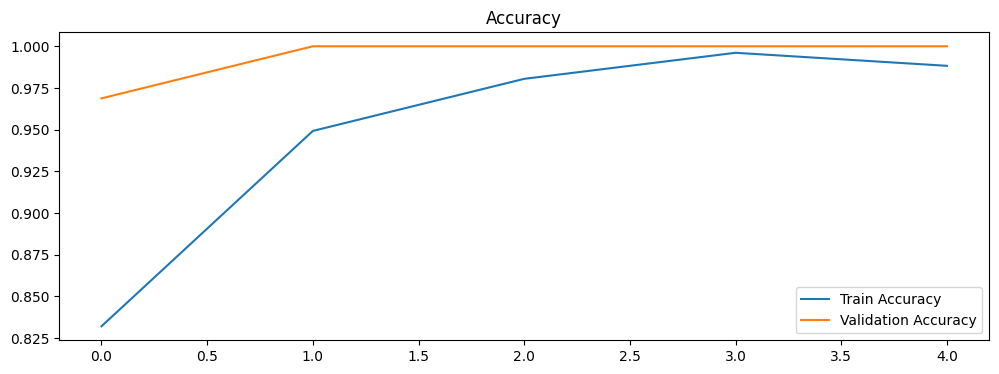

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(hist.history['accuracy'], label='Train Accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

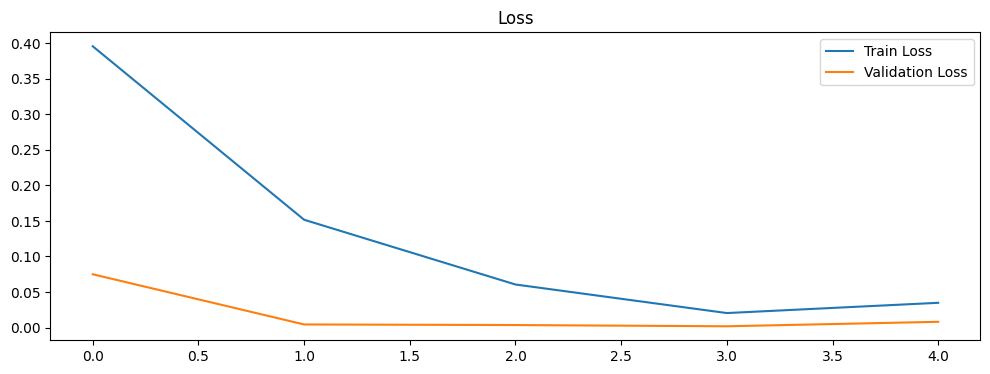

In [11]:
plt.figure(figsize=(12, 4))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()